In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import math
%matplotlib inline  

In [2]:
def load_data(dataloc):
    data = np.loadtxt(dataloc, unpack='true')
    data = np.transpose(data, (1,0))
    return data

In [3]:
def extract_feature(image):
    image = np.reshape(image, (16, 16))
    flip_image = np.flip(image, 1)
    diff = abs(image-flip_image)
    sys  = -sum(sum(diff))/256
    intense = sum(sum(image))/256
    return sys, intense

In [4]:
def load_features(dataloc):
    data = load_data(dataloc)
    n, _ = data.shape
    data_set = []
    for i in range(n):
        label = 1 if data[i, 0]==1 else -1
        image = data[i, 1:]
        sys, intense = extract_feature(image)
        data_set.append([label, 1, sys, intense])
    return np.array(data_set)[:,1:], np.array(data_set)[:,0]

In [5]:
def equal(x, y):
    return True if abs(x-y) < 0.001 else False

# #1

In [6]:
def show_images(data):
    '''
    This function is used for plot image and save it.

    Args:
    data: Two images from train data with shape (2, 16, 16). The shape represents total 2
          images and each image has size 16 by 16. 

    Returns:
        Do not return any arguments, just save the images you plot for your report.
    '''
    for iImag in range(len(data)):
        dataRow = data[iImag][1:]
        pixels  = np.matrix(dataRow)
        plt.figure(figsize=(2.5,2.5))
        plt.imshow(pixels ,cmap='gray')
        plt.show()

In [7]:
def play_with_data():
    # show the data
    trainDataFileName = "../data/train.txt"
    nums = 2
    data = load_data(trainDataFileName)[0:nums,1:]
    [n,d]=data.shape
    w = math.floor(math.sqrt(d))
    data = np.reshape(data, (nums, w, w))
    show_images(data)
    print("play with data done!")

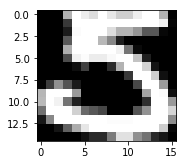

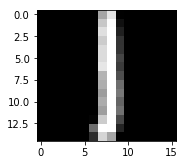

play with data done!


In [8]:
play_with_data()

# #2

In [59]:

def show_features(data, label):
    '''
    This function is used for plot a 2-D scatter plot of the features and save it. 

    Args:
        data: train features with shape (1561, 2). The shape represents total 1561 samples and 
        each sample has 2 features.
        
        label: train data's label with shape (1561,1). 
             1 for digit number 1  
            -1 for digit number 5.

    Returns:
        Do not return any arguments, just save the 2-D scatter plot of the features you plot for your report.
    '''
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(data[:,0][label == 1], data[:,1][label == 1] , color='red', marker='*')
    ax.scatter(data[:,0][label == -1], data[:,1][label == -1],color='blue', marker='+')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_facecolor('#f0f0f0')
    ax.set(xlim=(-0.95, .01), ylim=(-0.9, 0.15), xlabel='Feature 1', ylabel='Feature 2', title='Homework2')

In [60]:
def play_with_features():
    #get data
    traindataloc,testdataloc = "../data/train.txt", "../data/test.txt"
    train_data,train_label = load_features(traindataloc)
    test_data, test_label = load_features(testdataloc)
    
    show_features(train_data[:,1:3],train_label)
    print("play with features done!")

play with features done!


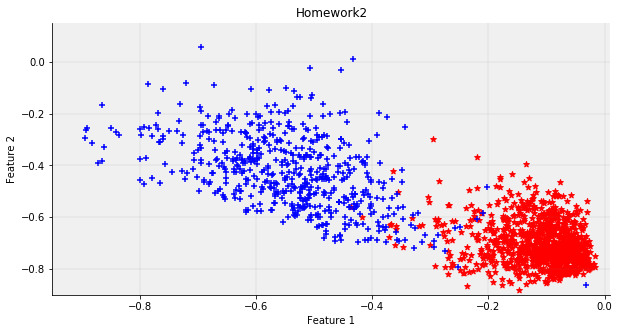

In [61]:
play_with_features()

# #3

In [12]:
def sign(x):
    return 1 if x > 0 else -1

In [13]:
def accuracy_perceptron(data, label, w):
    n, _ = data.shape
    mistakes = 0
    
    for i in range(n):
        if(sign(np.dot(data[i,:],np.transpose(w))) != label[i]):
            mistakes += 1
    return (n-mistakes)/n

In [14]:
def perceptron(data, label, max_iter, learning_rate):
    '''
    The perceptron classifier function.

    Args:
    data: train data with shape (1561, 3), which means 1561 samples and 
          each sample has 3 features.(1, symmetry, average internsity)
          
    label: train data's label with shape (1561,1). 
           1 for digit number 1 and -1 for digit number 5.
           
    max_iter: max iteration numbers
    
    learning_rate: learning rate for weight update

    Returns:
        w: the seperater with shape (1, 3). You must initilize it with w = np.zeros((1,d))
    '''
    w = np.zeros((1,len(data[0]))) 
    
    for t in range(max_iter):
        for i, x in enumerate(data):
            prediction = 1.0 if np.dot(w,data[i]) >= 0.0 else -1.0 
            if(prediction != label[i]):
                w = w + (learning_rate * label[i] * data[i])
    return w
            


In [15]:
def test_perceptron(max_iter, learning_rate):
    #get data
    traindataloc,testdataloc = "../data/train.txt", "../data/test.txt"
    train_data,train_label = load_features(traindataloc)
    test_data, test_label = load_features(testdataloc)
    
    #train perceptron
    w = perceptron(train_data, train_label, max_iter, learning_rate)
    train_acc = accuracy_perceptron(train_data, train_label, w)
   
    #test perceptron model
    test_acc = accuracy_perceptron(test_data, test_label, w)
    return w, train_acc, test_acc

In [16]:
def test_accuracy():
    max_iter = [10, 30, 50, 100, 200]
    result_mi = [(0.973,0.948), (0.971, 0.950), (0.980, 0.962), (0.981, 0.959), (0.977, 0.948)]
    learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
    result_lr = [(0.981, 0.962), (0.981, 0.962), (0.981, 0.962), (0.981, 0.962), (0.981, 0.962)]
    for i, m_iter in enumerate(max_iter):
        _, train_acc, test_acc = test_perceptron(m_iter, learning_rate[0])
        print("Case %d train accuracy:%f  test accuracy: %f"%(i+1, train_acc, test_acc))
    for i, l_rate in enumerate(learning_rate):
        _, train_acc, test_acc = test_perceptron(max_iter[4], l_rate)
        print("Case %d train accuracy:%f  test accuracy: %f"%(i+6,train_acc, test_acc))
    print("accuracy test done!")

In [17]:
test_accuracy()

Case 1 train accuracy:0.981422  test accuracy: 0.959906
Case 2 train accuracy:0.975657  test accuracy: 0.945755
Case 3 train accuracy:0.976297  test accuracy: 0.948113
Case 4 train accuracy:0.975657  test accuracy: 0.945755
Case 5 train accuracy:0.975657  test accuracy: 0.945755
Case 6 train accuracy:0.975657  test accuracy: 0.945755
Case 7 train accuracy:0.975657  test accuracy: 0.945755
Case 8 train accuracy:0.975657  test accuracy: 0.945755
Case 9 train accuracy:0.975657  test accuracy: 0.945755
Case 10 train accuracy:0.975657  test accuracy: 0.945755
accuracy test done!


# #4

In [56]:
def show_result(data, label, w):
    '''
    This function is used for plot the test data with the separators and save it.

    Args:
    data: test features with shape (424, 2). The shape represents total 424 samples and 
          each sample has 2 features.
    label: test data's label with shape (424,1). 
           1 for digit number 1 and -1 for digit number 5.

    Returns:
    Do not return any arguments, just save the image you plot for your report.
    '''
    b  = w[0,0]
    wx = w[0,1]
    wy = w[0,2]
    
    x = np.linspace(-0.4,-0.2,100)
    y = (-b-(x*wx))/wy
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y, '-g')
    ax.scatter(data[:,0][label == 1], data[:,1][label == 1] , color='red', marker='*')
    ax.scatter(data[:,0][label == -1], data[:,1][label == -1],color='blue', marker='+')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_facecolor('#f0f0f0')
    ax.set(xlim=(-0.95, .01), ylim=(-0.9, 0.15), xlabel='Feature 1', ylabel='Feature 2', title='Homework2')

In [57]:
def play_with_result():
    traindataloc,testdataloc = "../data/train.txt", "../data/test.txt"
    train_data,train_label = load_features(traindataloc)
    test_data, test_label = load_features(testdataloc)
    max_iter = 100
    learning_rate = 0.5
    w = perceptron(train_data, train_label, max_iter, learning_rate)
    show_result(test_data[:,1:3], test_label, w)
    print("play with result done!")

play with result done!


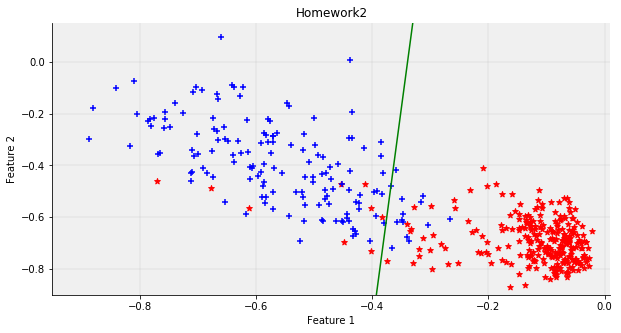

In [58]:
play_with_result()